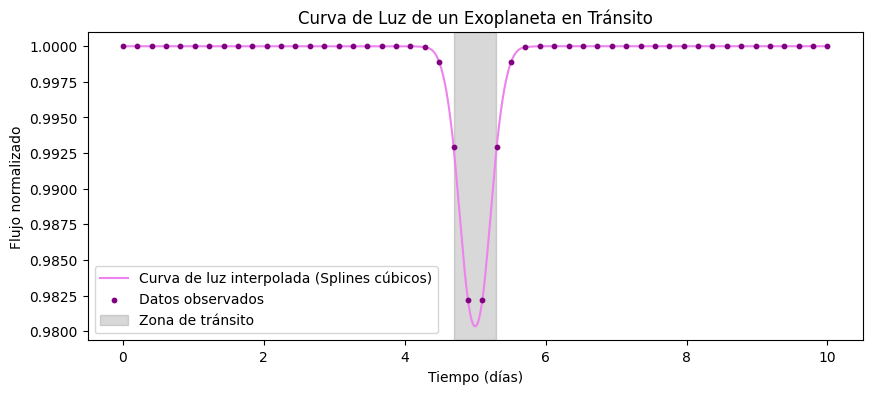

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos simulados
tiempo = np.linspace(0, 10, 50)
flujo = 1 - 0.02 * np.exp(-((tiempo - 5) / 0.3) ** 2)  #Simulación de tránsito exoplanetario

#Construcción de la matriz para los coeficientes del spline cúbico
def spline_cubico(x_data, y_data):
    n = len(x_data) - 1
    h = np.diff(x_data)  #Diferencias entre los puntos de x
    alpha = [0] * (n + 1)

    for i in range(1, n):
        alpha[i] = (3 / h[i]) * (y_data[i + 1] - y_data[i]) - (3 / h[i - 1]) * (y_data[i] - y_data[i - 1])

    #Matrices tridiagonales
    l = [1] + [0] * n
    mu = [0] * (n + 1)
    z = [0] * (n + 1)

    for i in range(1, n):
        l[i] = 2 * (x_data[i + 1] - x_data[i - 1]) - h[i - 1] * mu[i - 1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    #Coeficientes
    b = [0] * (n + 1)
    c = [0] * (n + 1)
    d = [0] * (n + 1)

    for j in range(n - 1, -1, -1):
        c[j] = z[j] - mu[j] * c[j + 1]
        b[j] = (y_data[j + 1] - y_data[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])

    return x_data, y_data, b, c, d

#Evaluar el spline cúbico
def evaluar_spline(x, x_data, y_data, b, c, d):
    for i in range(len(x_data) - 1):
        if x_data[i] <= x <= x_data[i + 1]:
            dx = x - x_data[i]
            return y_data[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3
    return None

#Interpolación con splines cúbicos
x_data, y_data, b, c, d = spline_cubico(tiempo, flujo)
tiempo_fino = np.linspace(0, 10, 500)
flujo_fino = [evaluar_spline(t, x_data, y_data, b, c, d) for t in tiempo_fino]

#Gráfico de la curva de luz interpolada
plt.figure(figsize=(10, 4))
plt.plot(tiempo_fino, flujo_fino, label="Curva de luz interpolada (Splines cúbicos)", color="violet", zorder=2)
plt.scatter(tiempo, flujo, color="purple", s=10, label="Datos observados", zorder=3)
plt.axvspan(4.7, 5.3, color='gray', alpha=0.3, label="Zona de tránsito", zorder=1)
plt.xlabel("Tiempo (días)")
plt.ylabel("Flujo normalizado")
plt.title("Curva de Luz de un Exoplaneta en Tránsito")
plt.legend(loc='lower left')
plt.show()

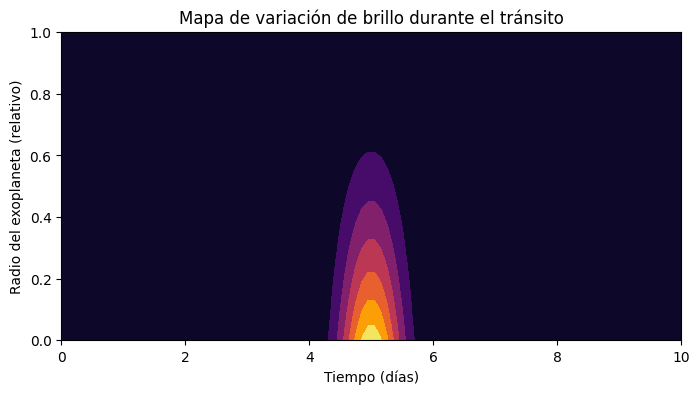

In [ ]:
#Variación del flujo con el radio del exoplaneta
t = np.linspace(0, 10, 100)
r = np.linspace(0, 1, 50)
T, R = np.meshgrid(t, r)
delta_flujo = (np.exp(-((T - 5) / 0.5) ** 2) * (R**2))
delta_flujo = np.flipud(delta_flujo)

plt.figure(figsize=(8, 4))
plt.contourf(T, R, delta_flujo, cmap="inferno")
plt.xlabel("Tiempo (días)")
plt.ylabel("Radio del exoplaneta (relativo)")
plt.title("Mapa de variación de brillo durante el tránsito")
plt.show()

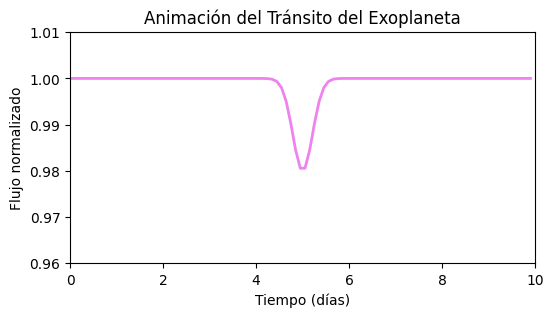

In [ ]:
from matplotlib.animation import FuncAnimation

#Generación de datos simulados
tiempo = np.linspace(0, 10, 100)
flujo = 1 - 0.02 * np.exp(-((tiempo - 5) / 0.3) ** 2)  # Simulación de tránsito exoplanetario

# Configuración de la figura
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_xlim(0, 10)
ax.set_ylim(0.96, 1.01)
ax.set_xlabel("Tiempo (días)")
ax.set_ylabel("Flujo normalizado")
ax.set_title("Animación del Tránsito del Exoplaneta")

# Línea vacía que se actualizará en la animación
linea, = ax.plot([], [], color="violet", lw=2)

# Función de actualización de la animación
def actualizar(i):
    linea.set_data(tiempo[:i], flujo[:i])
    return linea,

# Crear la animación
anim = FuncAnimation(fig, actualizar, frames=len(tiempo), interval=50, blit=True)

# Para Jupyter Notebook
from IPython.display import HTML
HTML(anim.to_jshtml())